# Today's Date - 2 July 2023
# Topic - Seeing what the layers of a CNN see

Code was taken from this awesome blog - https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [45]:
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from tensorflow.keras.models import Model

In [35]:
#Load the model
model = VGG16()

In [36]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

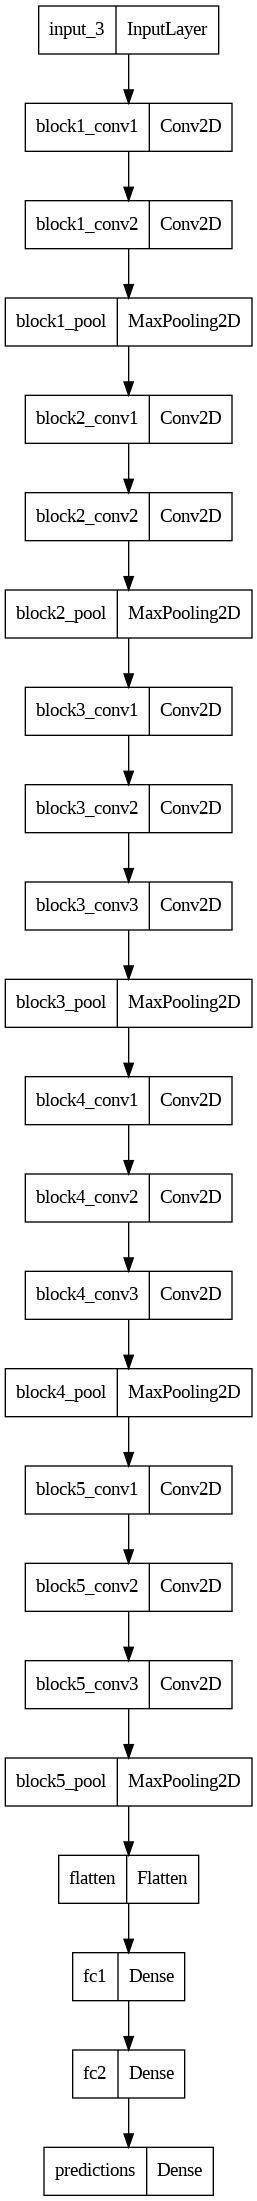

In [37]:
from keras.utils import plot_model

plot_model(model)

In [38]:
for i in range(len(model.layers)):
	# check for convolutional layer
	if 'conv' not in model.layers[i].name:
		continue
	# get filter weights
	filters, biases = model.layers[i].get_weights()
	print("layer number",i,model.layers[i].name, filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


## This is what a filter is
## You can see different filters have edges to detect  ↓ ↓

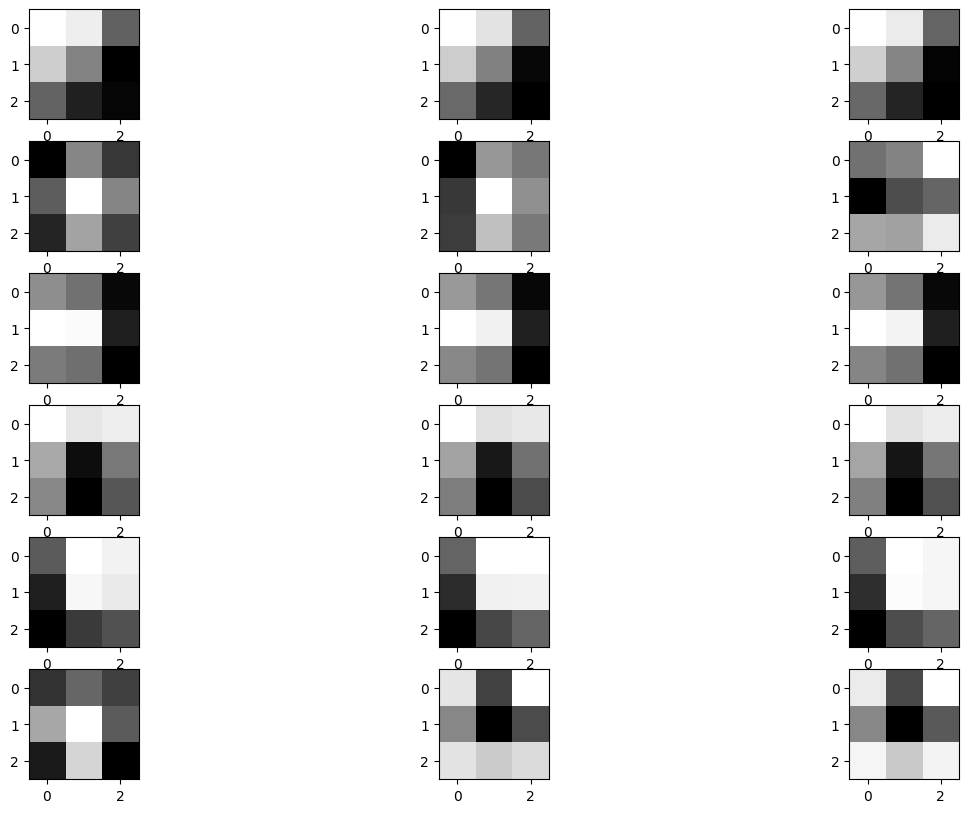

In [39]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[1].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters =6
ix=1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
plt.show()

## Importing Images and making predictions

In [40]:
img_path1 = '/content/dog.jpg'
img_path2 = '/content/chair.jpg'
img_path3 = '/content/mushroom.jpg'

img = image.load_img(img_path1, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
predictions1 = model.predict(x)

img = image.load_img(img_path2, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
predictions2 = model.predict(x)

img = image.load_img(img_path3, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
predictions3 = model.predict(x)

print("\nPreds for photo of a dog :")
decoded_predictions = decode_predictions(predictions1, top=3)[0]
for _, class_name, class_probability in decoded_predictions:
    print(f"{class_name}: {class_probability:.4f}")

print("\nPreds for photo of a chiar : ")
decoded_predictions = decode_predictions(predictions2, top=3)[0]
for _, class_name, class_probability in decoded_predictions:
    print(f"{class_name}: {class_probability:.4f}")

print("\nPreds for photo of a mushroom :")
decoded_predictions = decode_predictions(predictions3, top=3)[0]
for _, class_name, class_probability in decoded_predictions:
    print(f"{class_name}: {class_probability:.4f}")

1/1 [==============================] - 1s 591ms/step

Preds for photo of a dog :
basenji: 0.9992
Irish_terrier: 0.0003
wire-haired_fox_terrier: 0.0002

Preds for photo of a chiar : 
dining_table: 0.6371
folding_chair: 0.2107
desk: 0.0870

Preds for photo of a mushroom :
mushroom: 0.6702
agaric: 0.1683
hen-of-the-woods: 0.0559


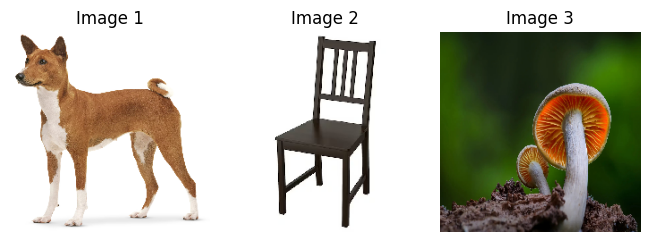

In [41]:
img1 = image.load_img(img_path1, target_size=(224, 224))
img2 = image.load_img(img_path2, target_size=(224, 224))
img3 = image.load_img(img_path3, target_size=(224, 224))

fig, axs = plt.subplots(1, 3, figsize=(6.6, 3.3))
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title('Image 1')
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title('Image 2')
axs[2].imshow(img3)
axs[2].axis('off')
axs[2].set_title('Image 3')
plt.tight_layout()
plt.show()

## Lets now see what does the CNN see behind the picture

It generalizes it as it further go down the layers
At initial layers you could identify by your eyes what the object is, but as layers progress, it starts generalizing

1/1 [==============================] - 1s 968ms/step


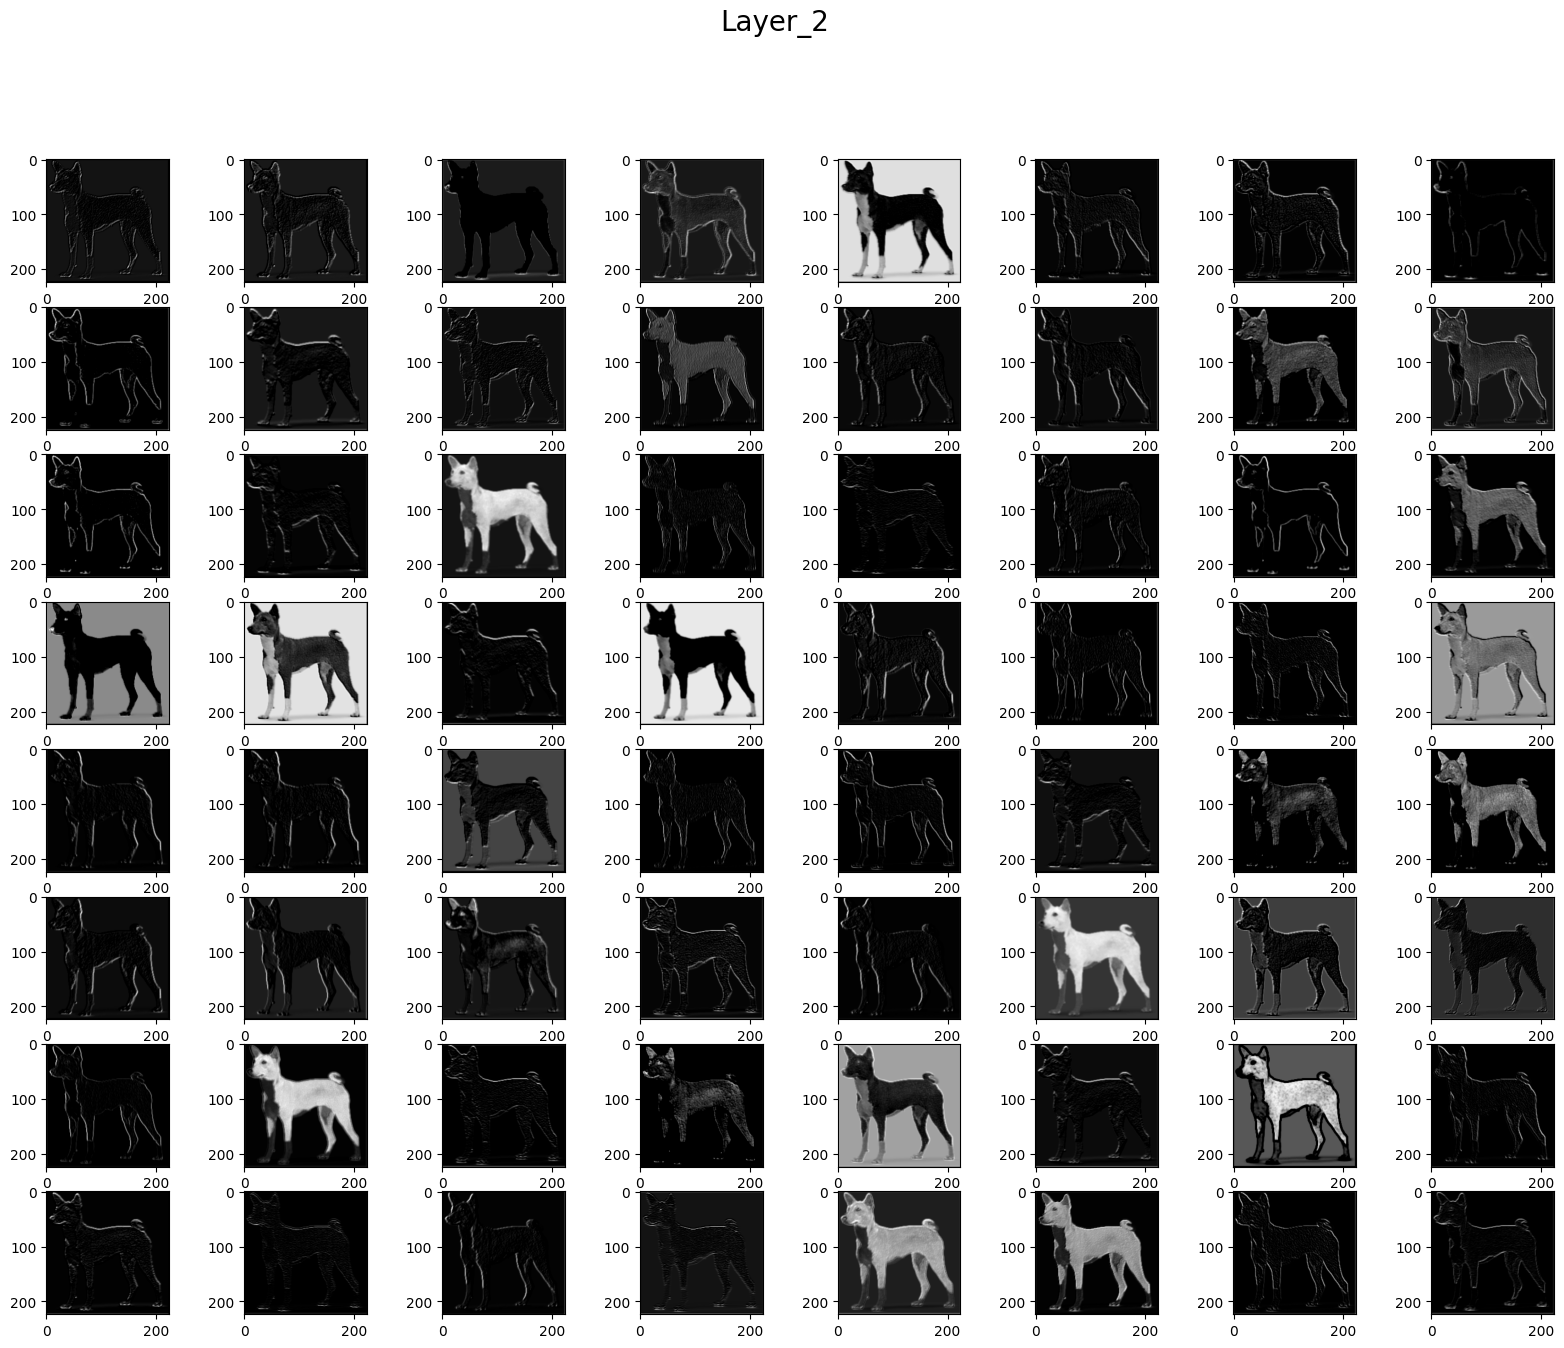

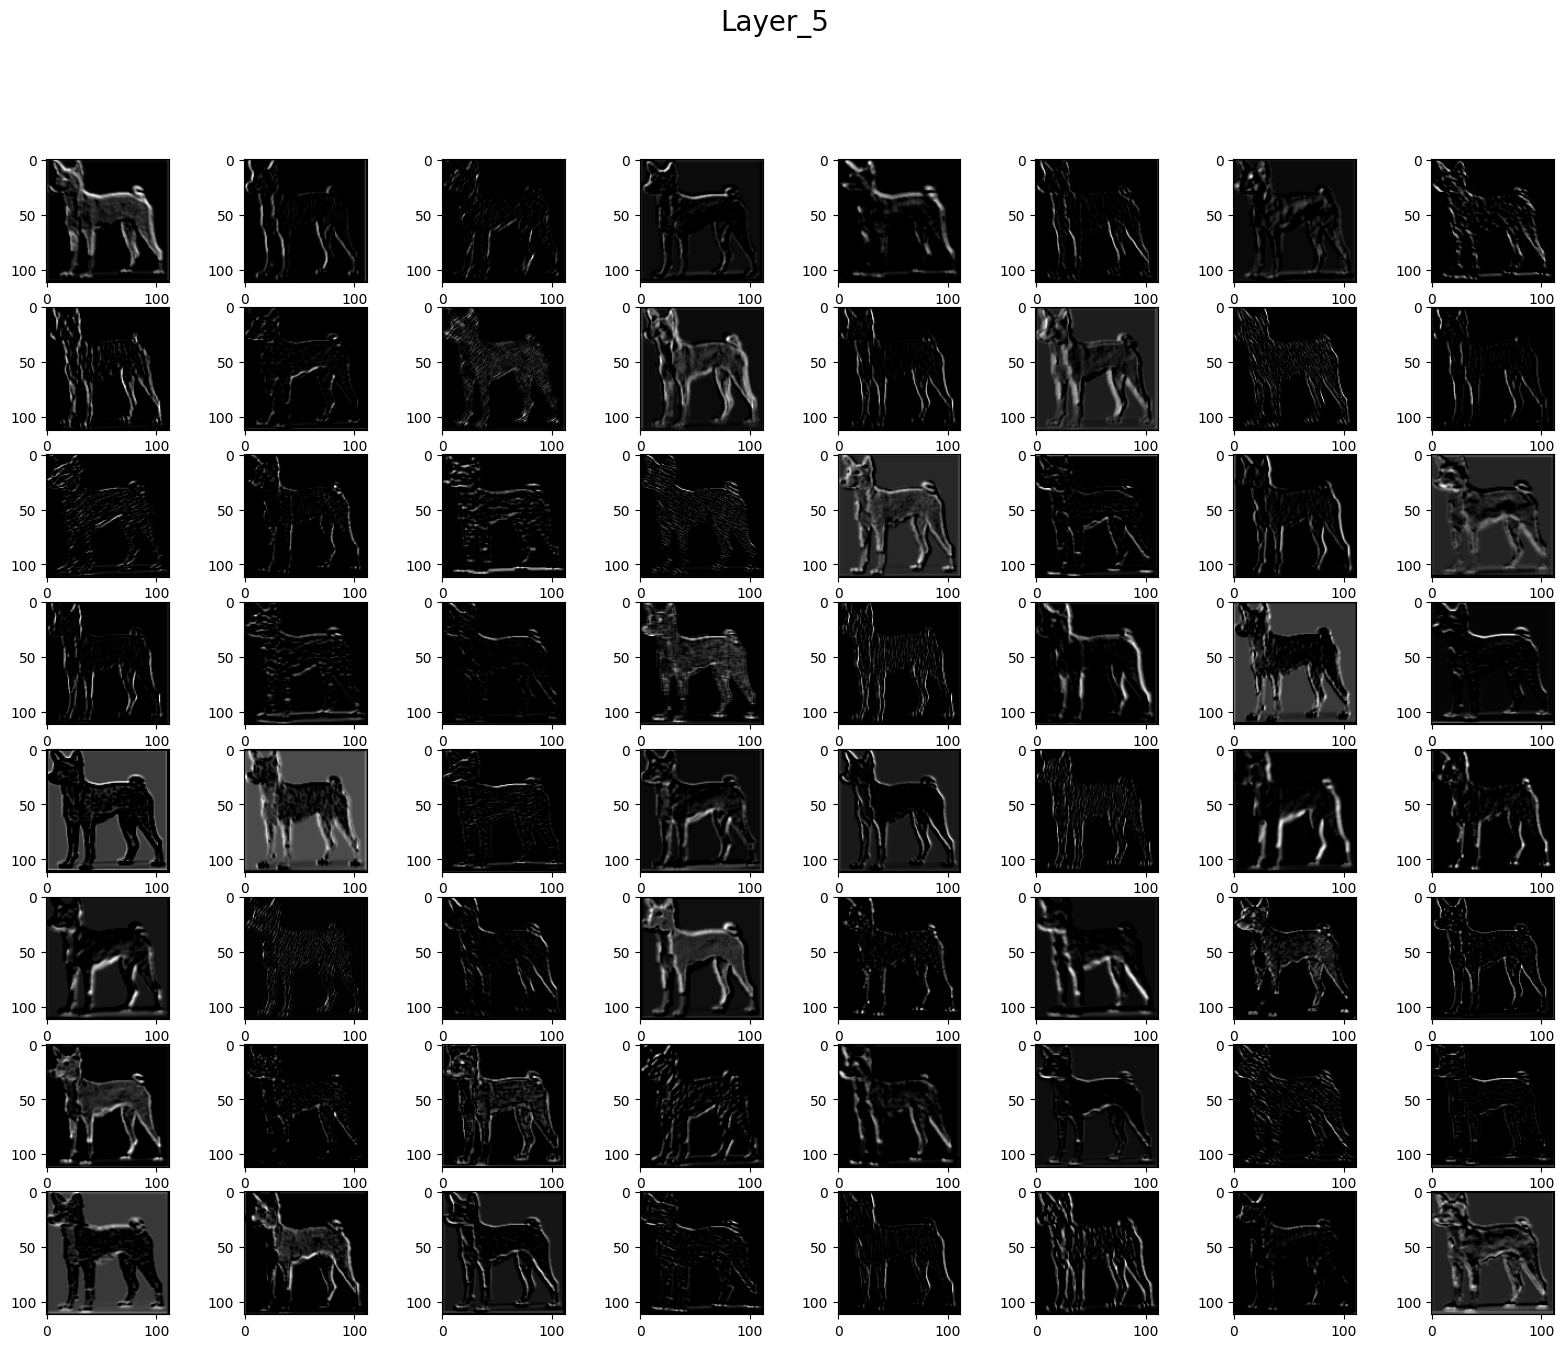

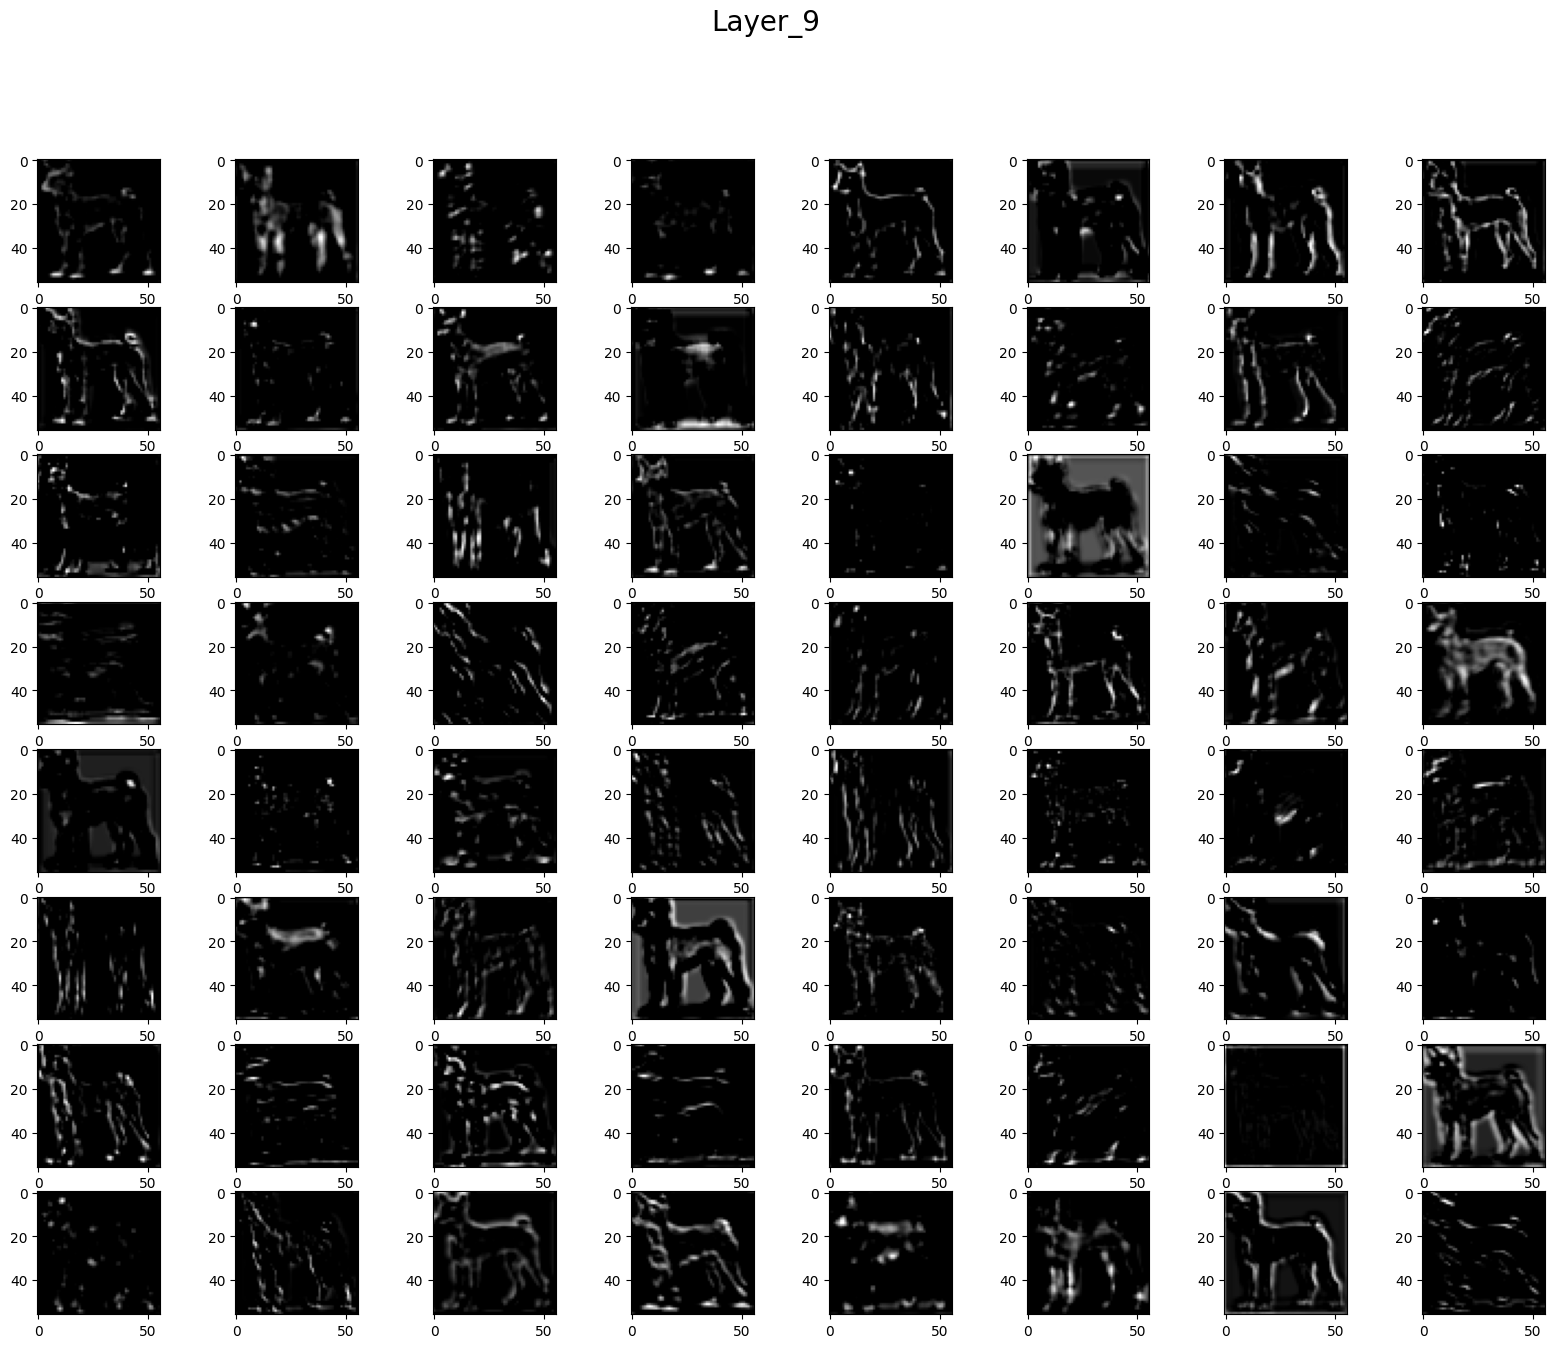

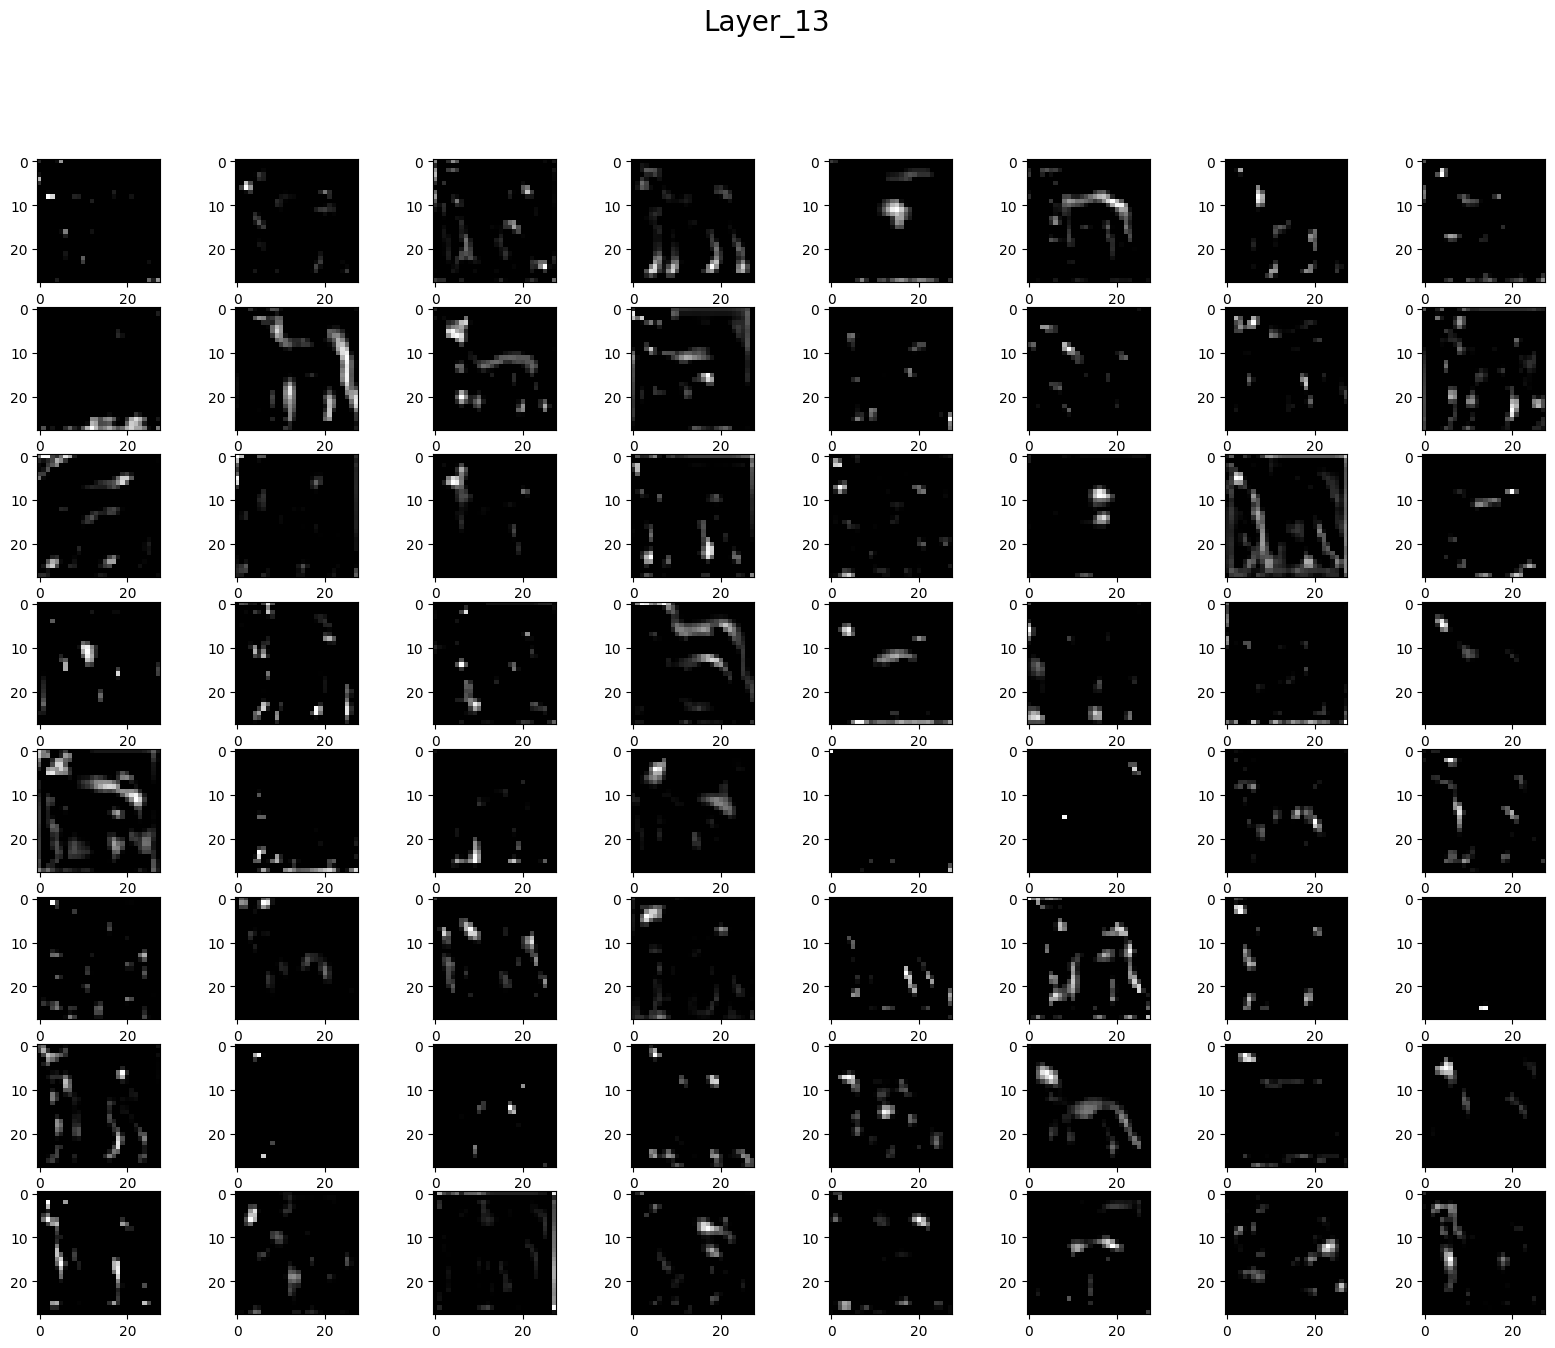

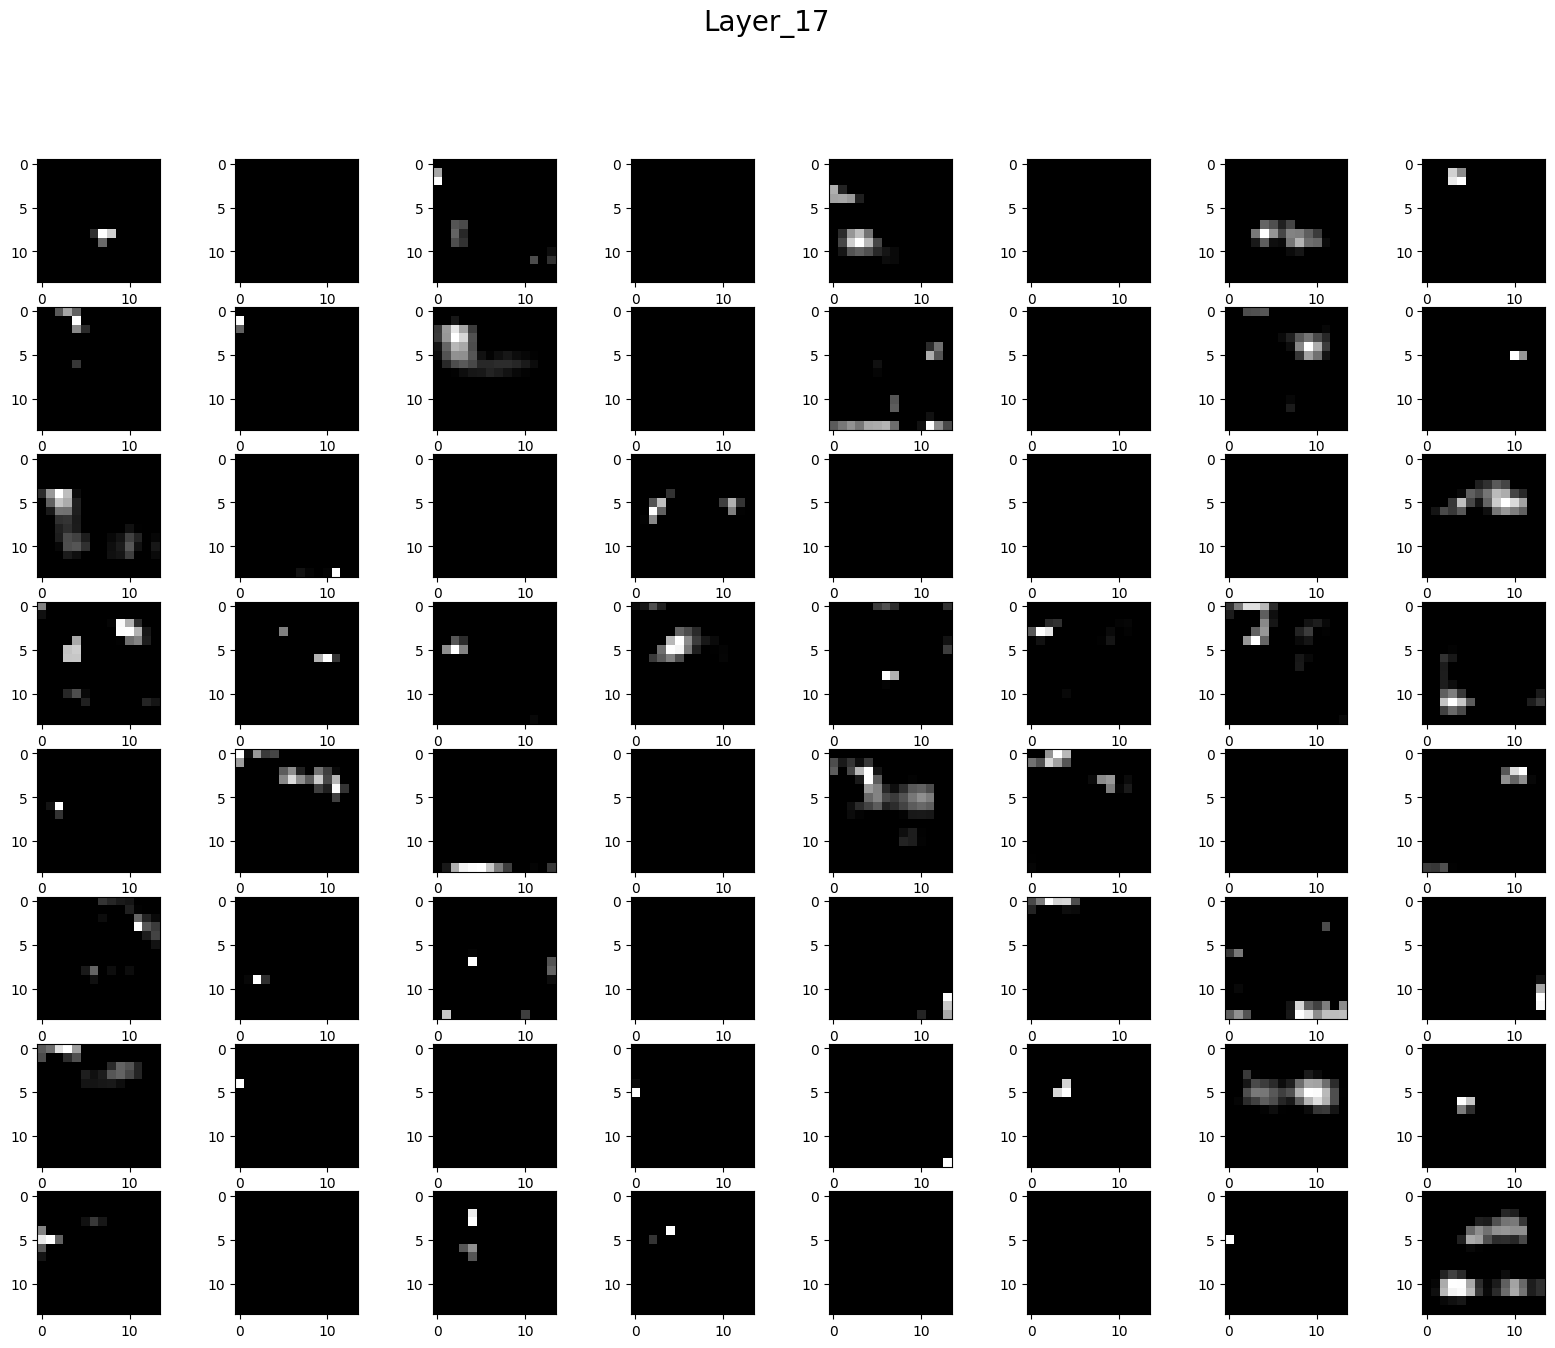

In [53]:
image = img1
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

model2 = VGG16()

layer_index = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model( inputs= model2.inputs, outputs = outputs)

feature_map = model3.predict(image)

for layer_idx, fmap in zip(layer_index, feature_map):
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle("Layer_{}".format(layer_idx), fontsize=20)
    num_channels = min(fmap.shape[3], 64)
    for i in range(1, num_channels + 1):
        plt.subplot(8, 8, i)
        plt.imshow(fmap[0, :, :, i - 1], cmap='gray')

plt.show()


1/1 [==============================] - 1s 1s/step


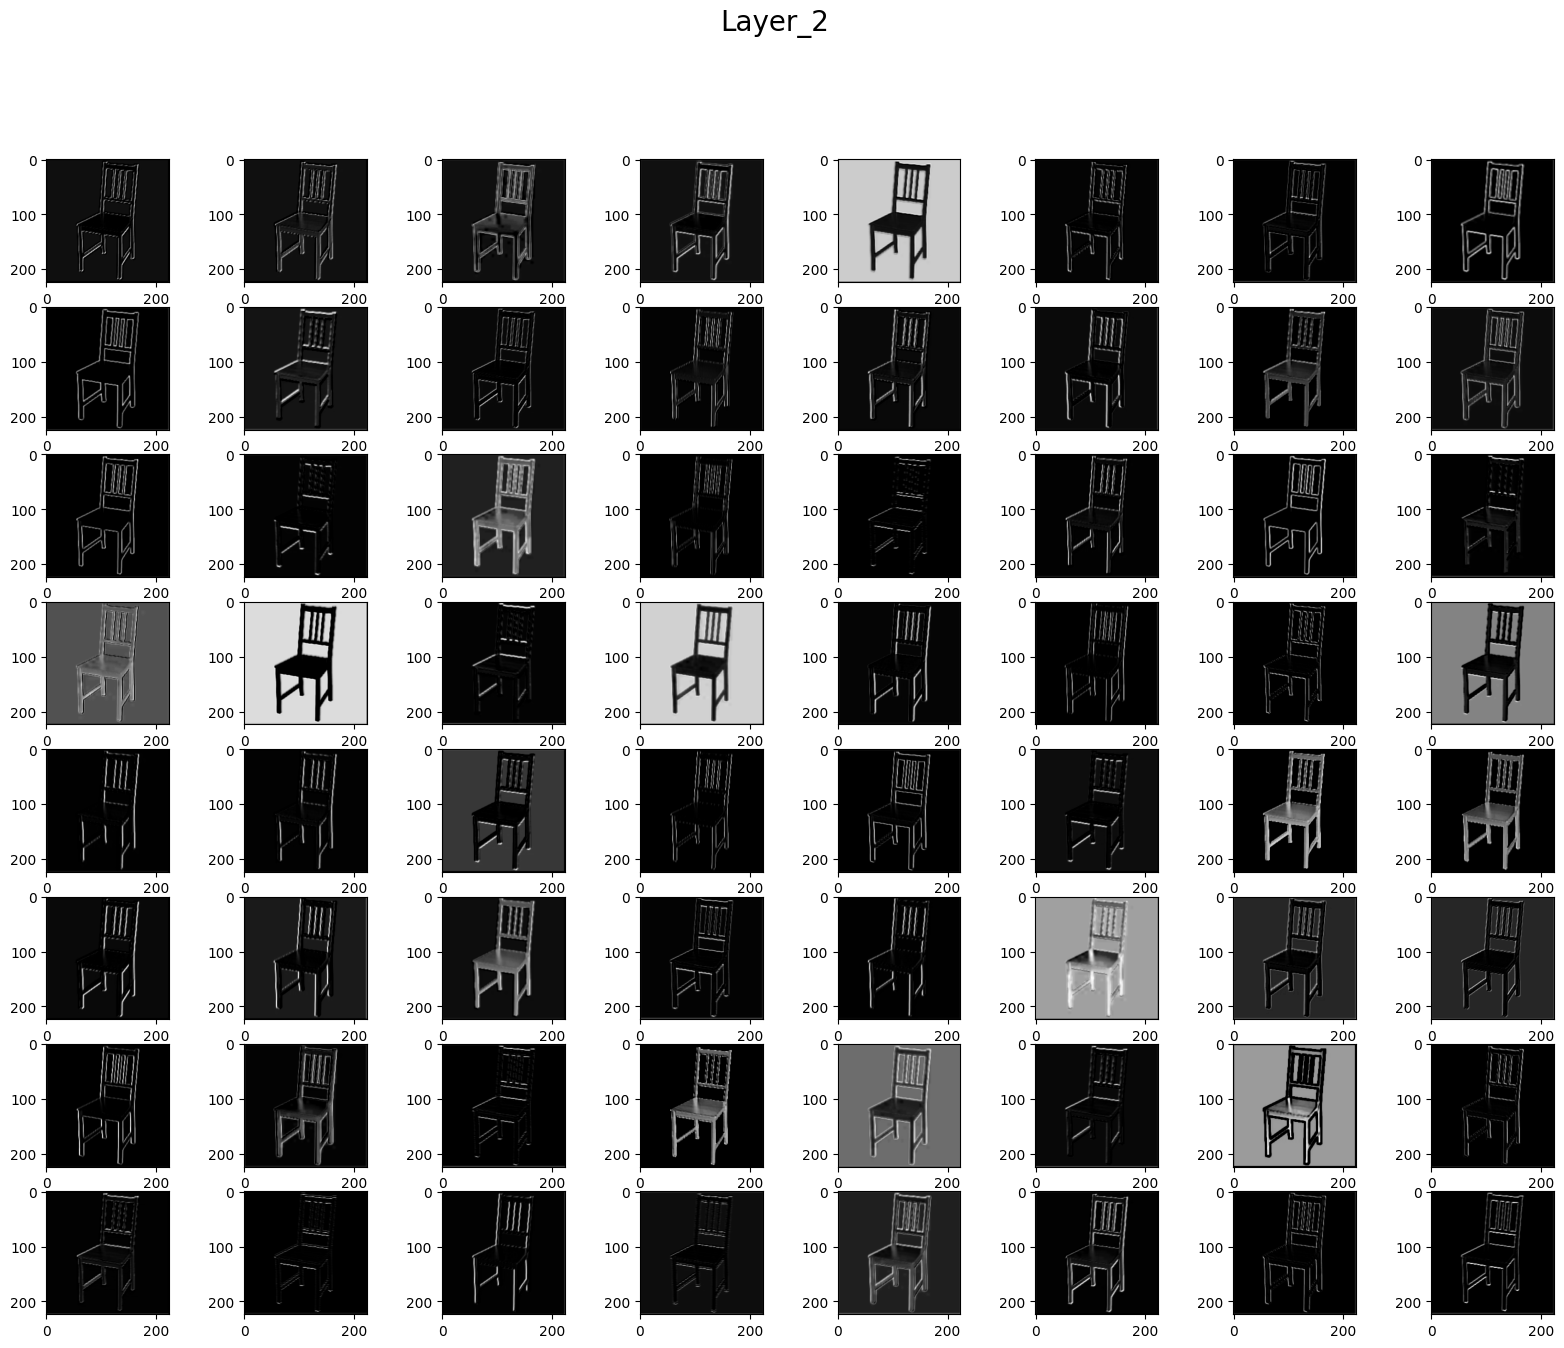

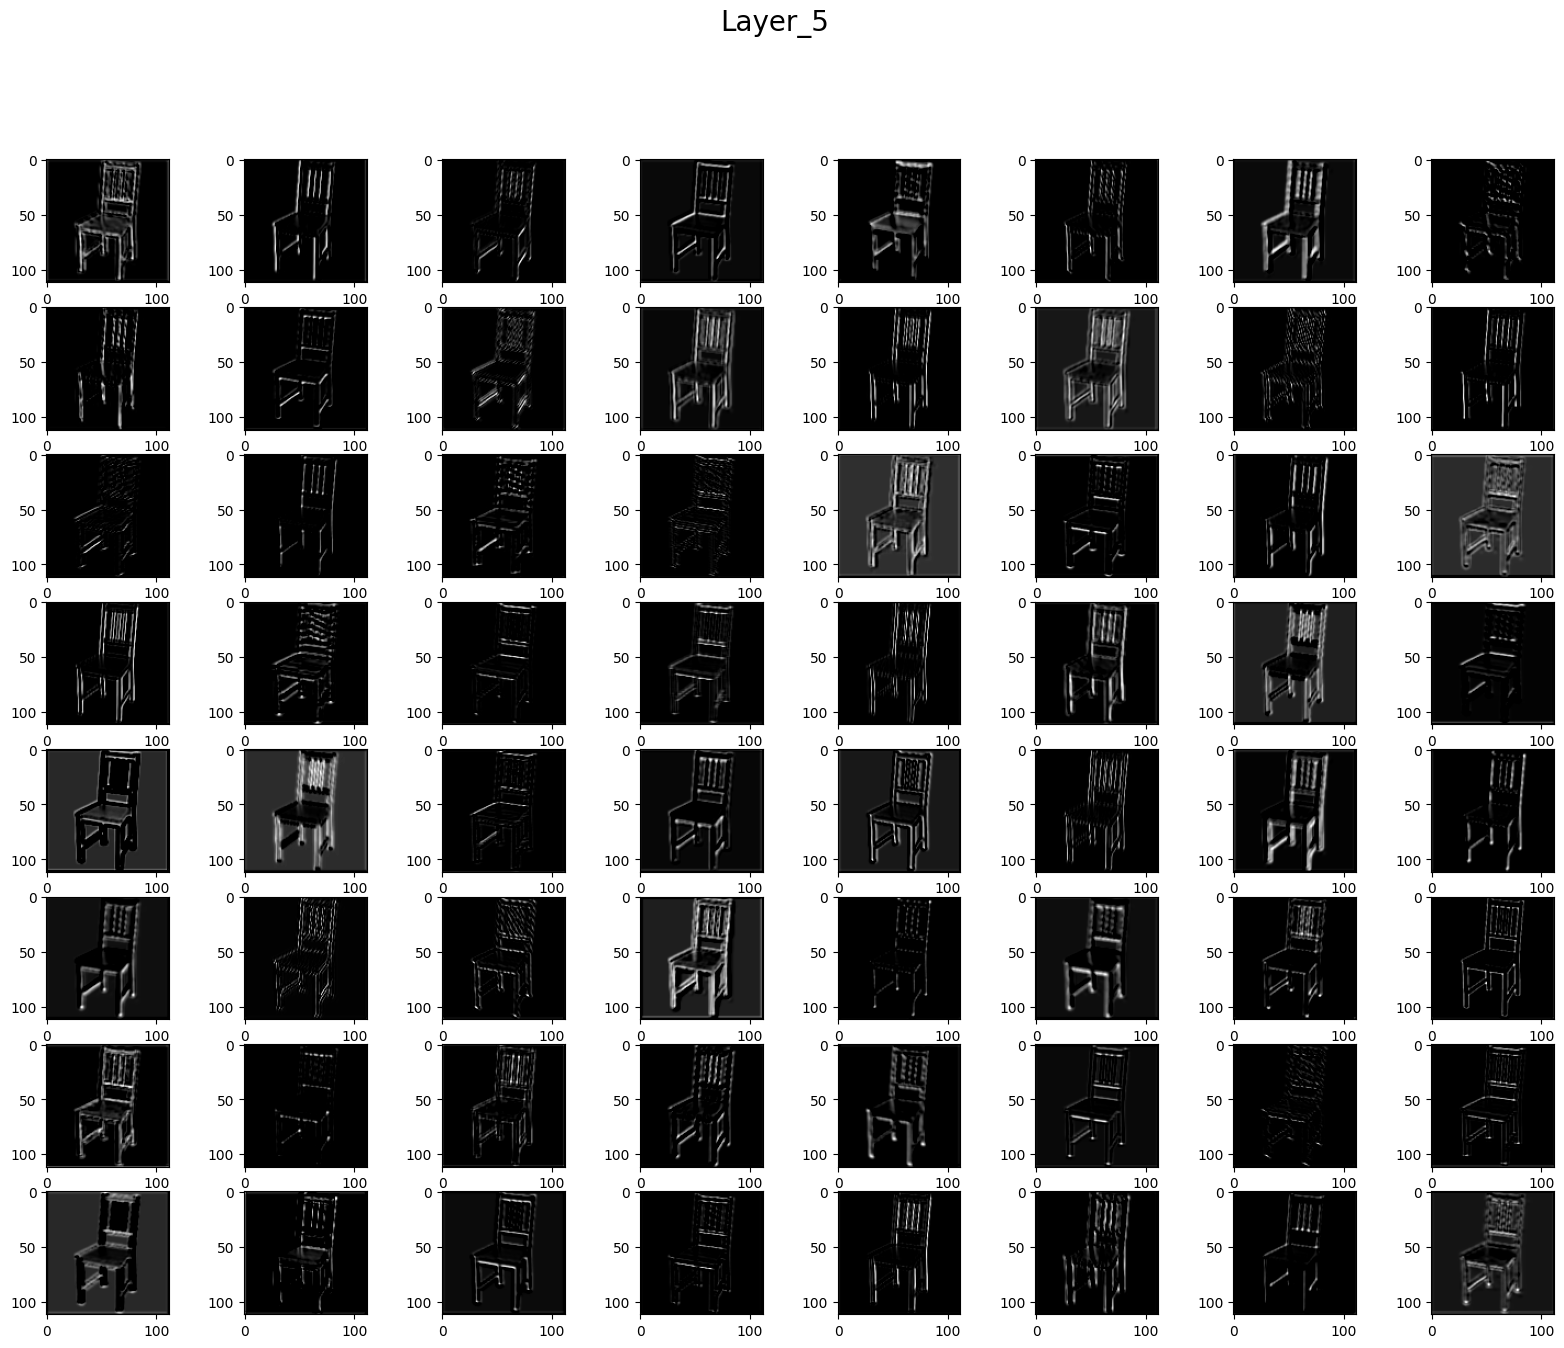

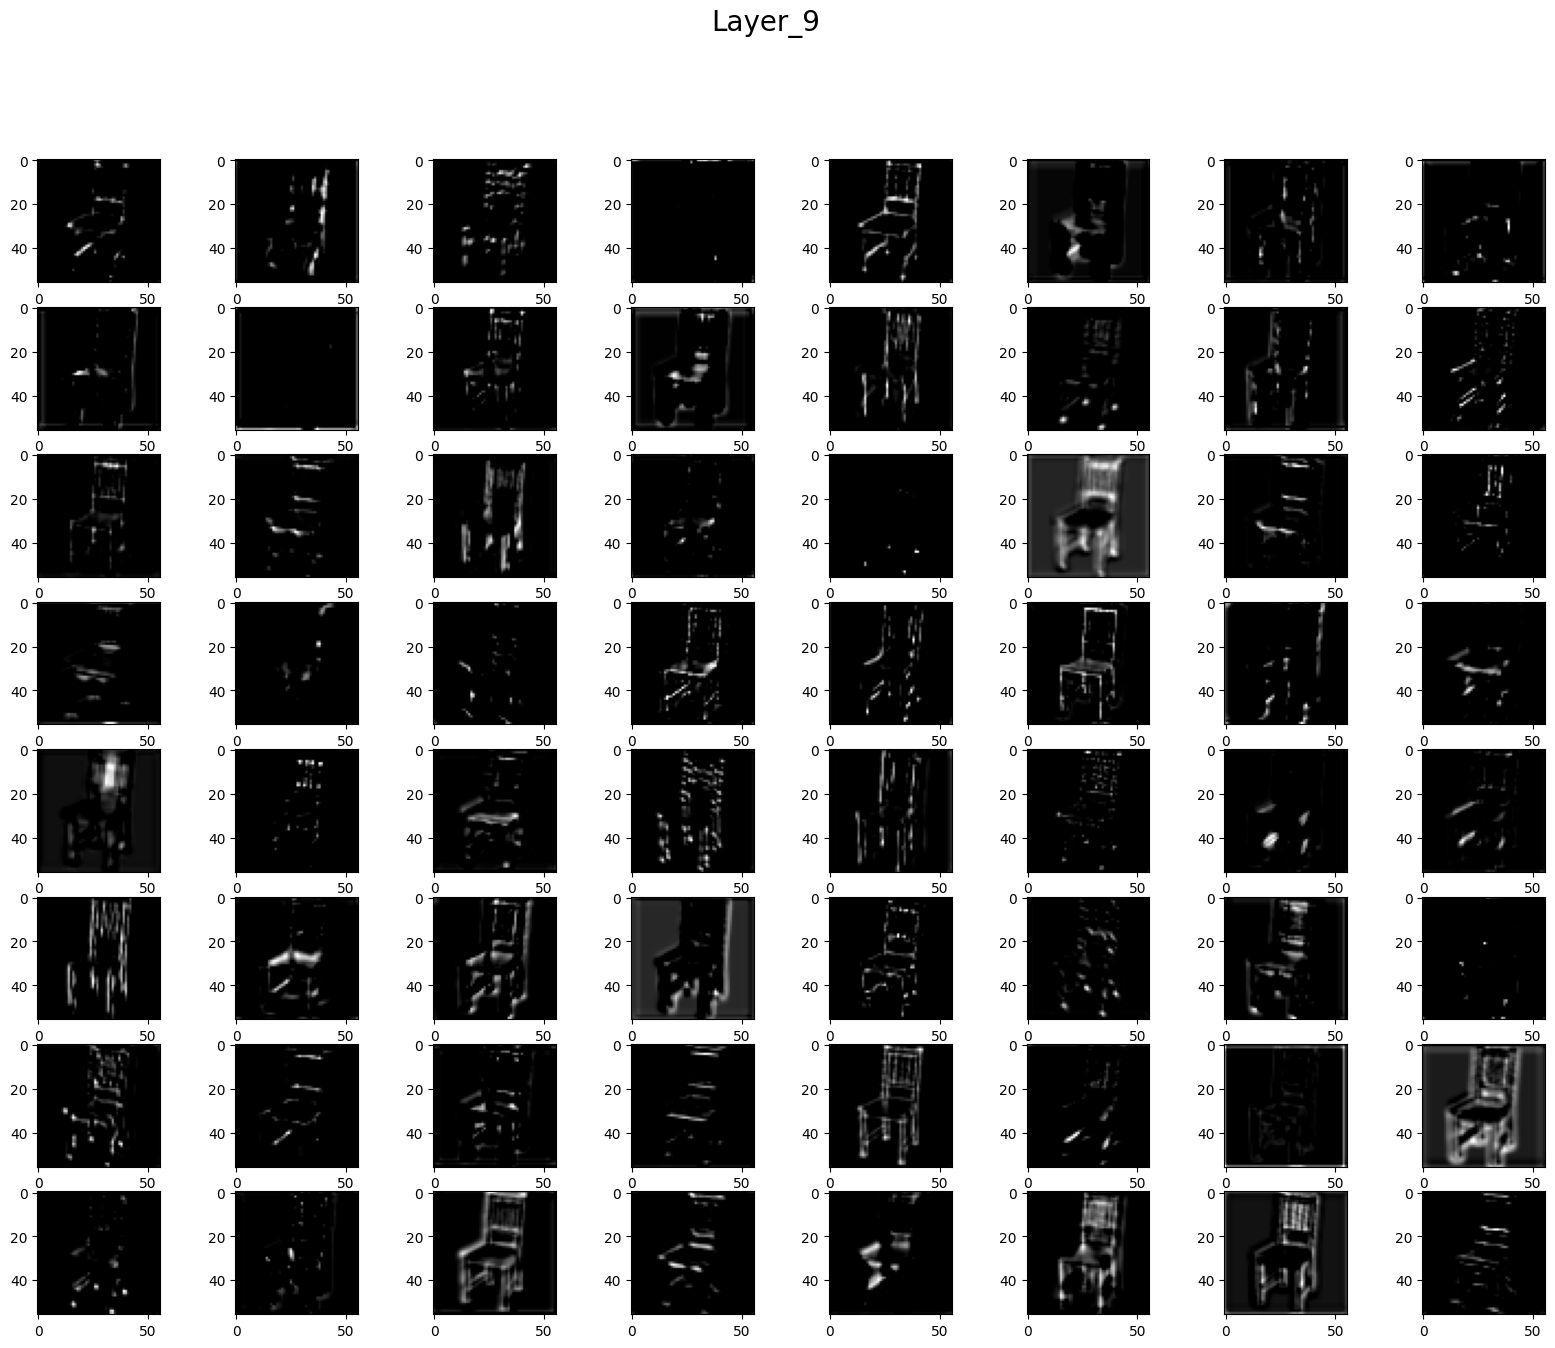

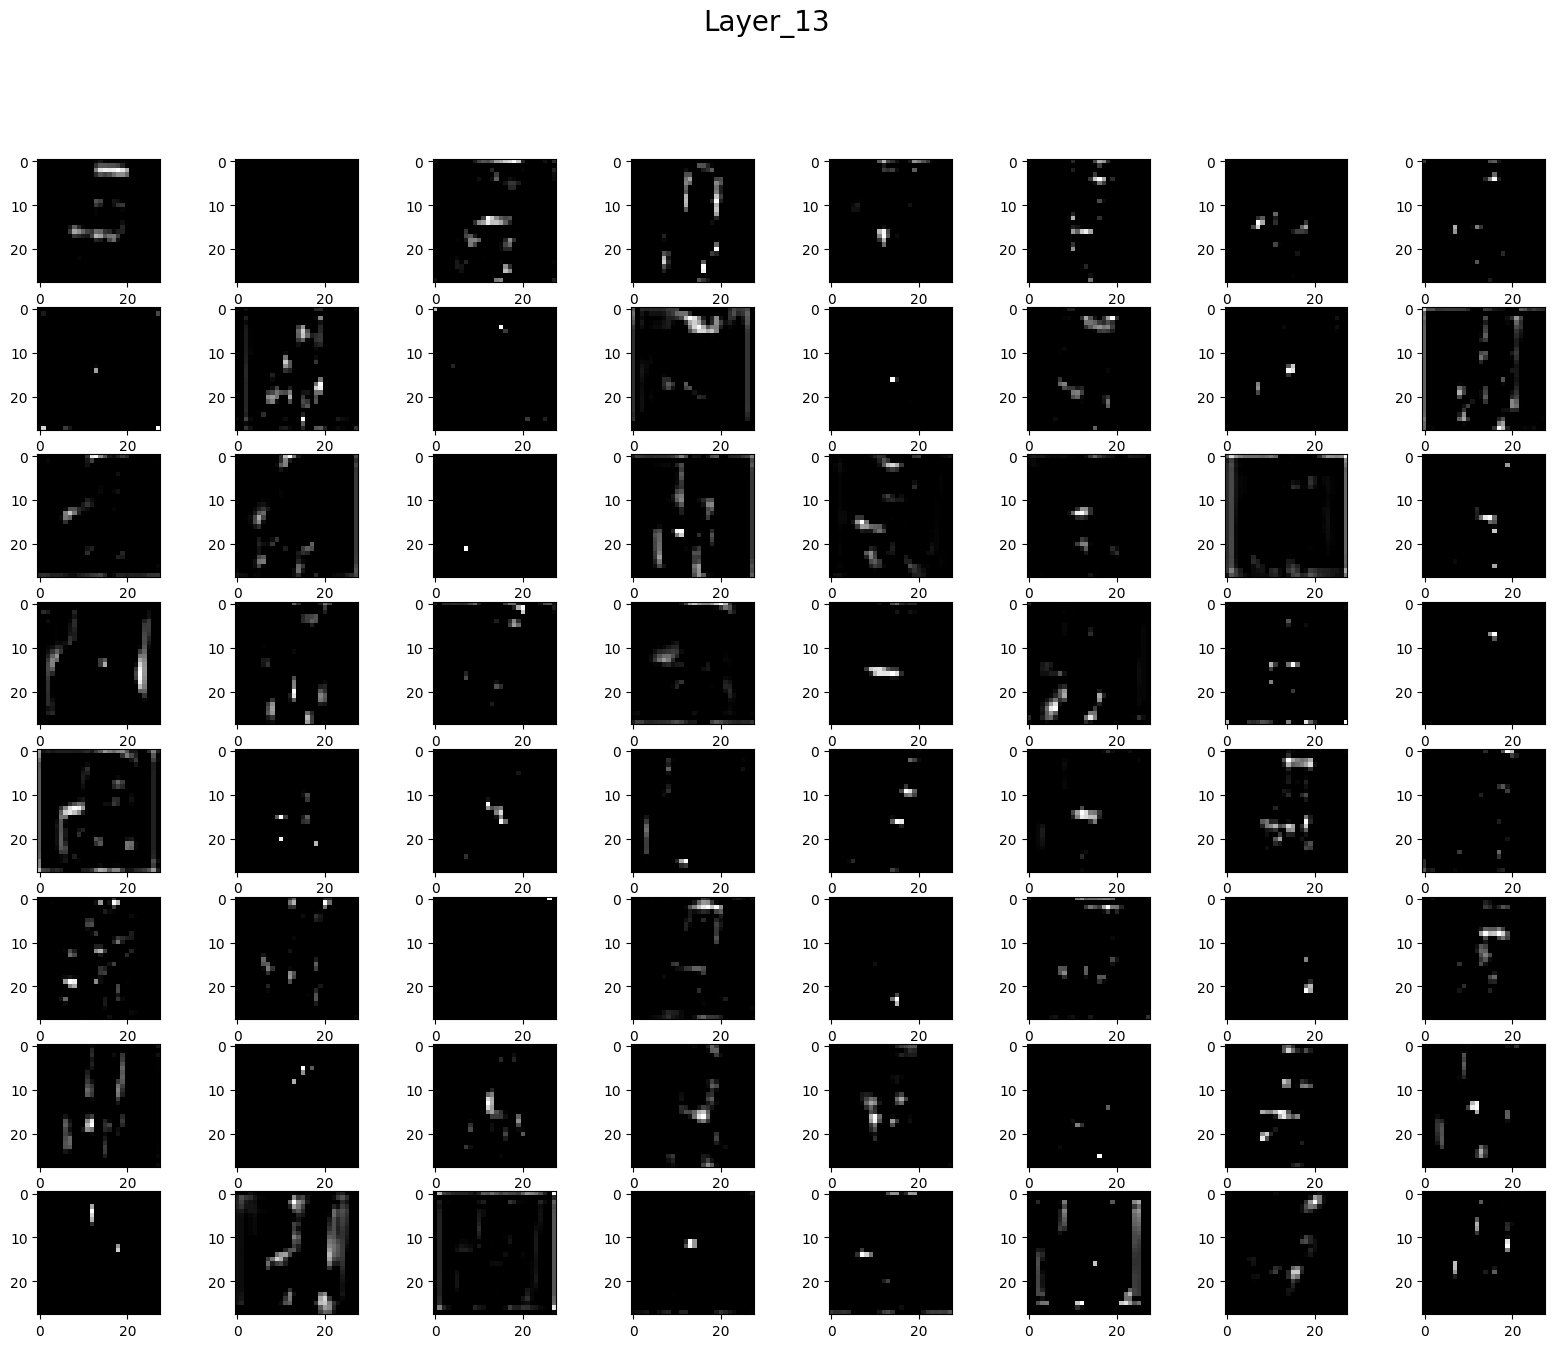

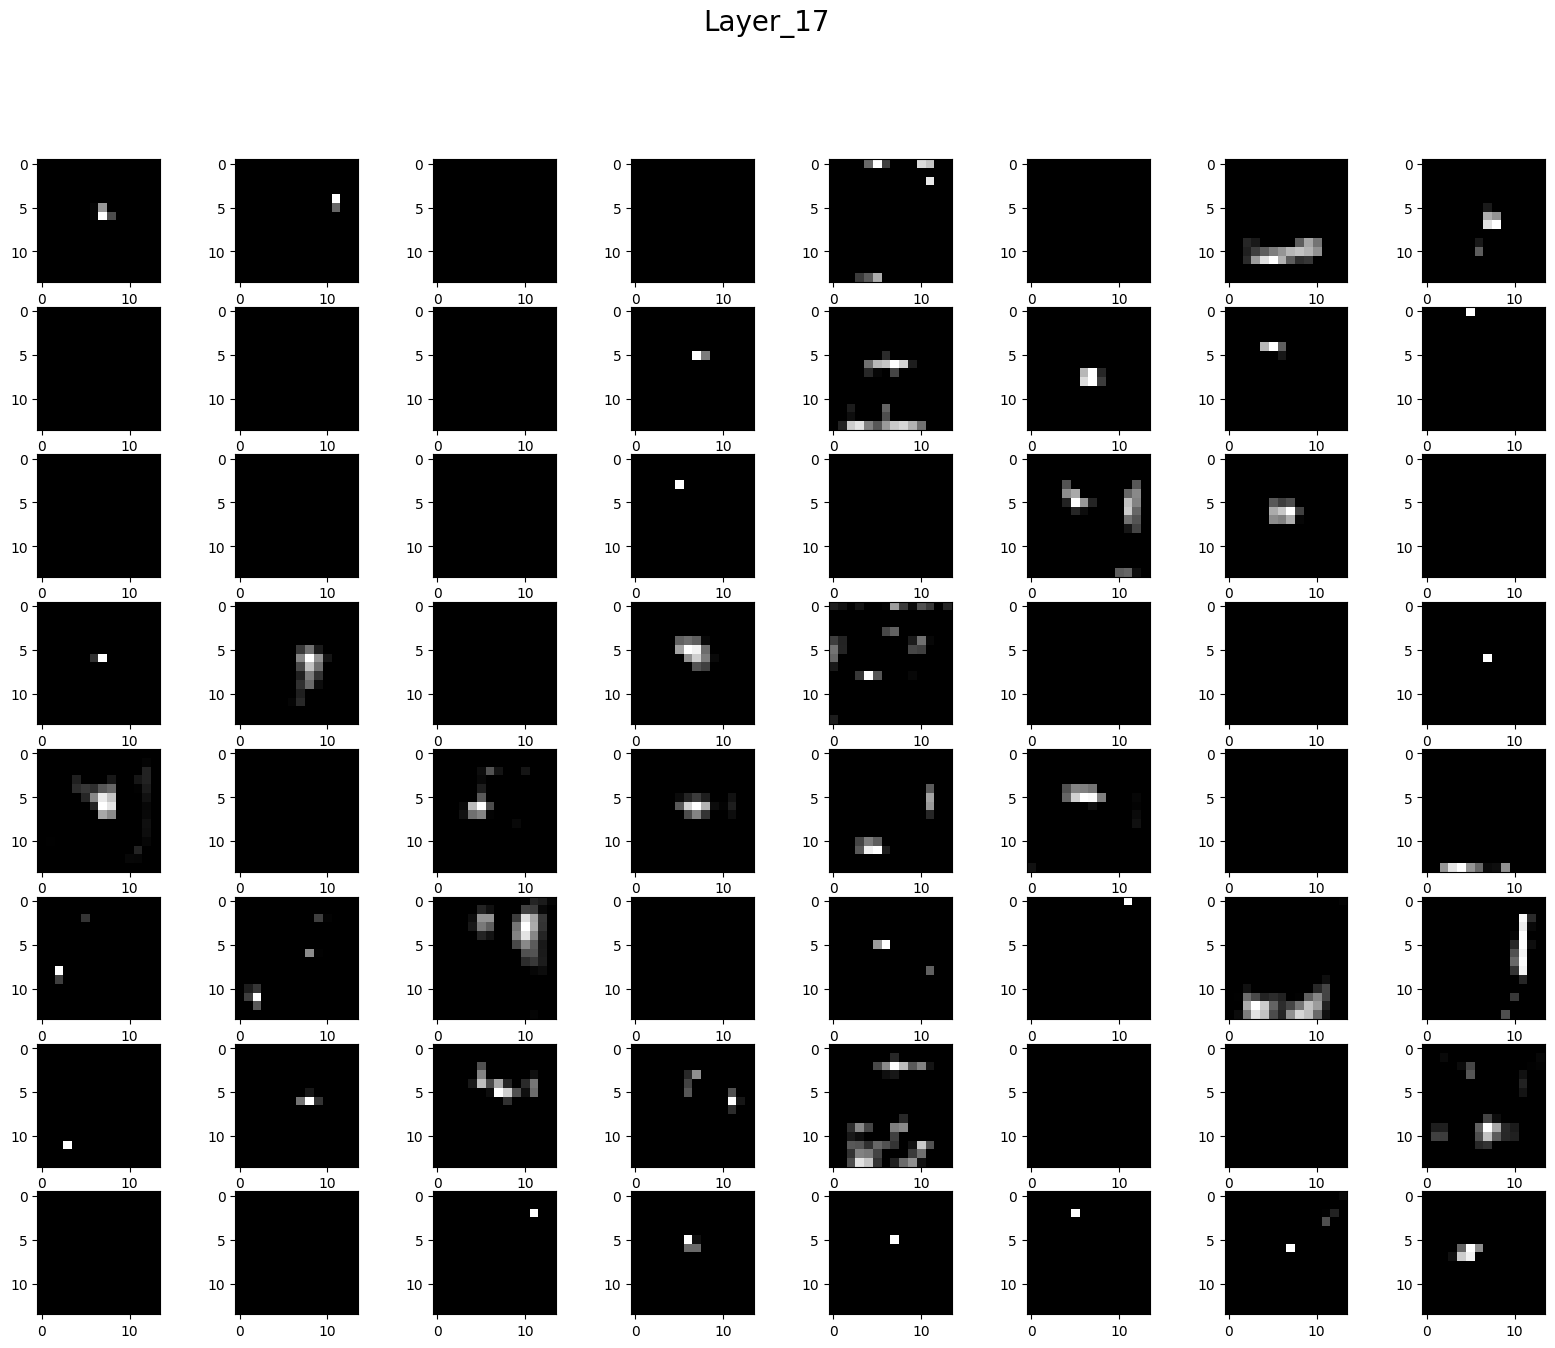

In [54]:
image = img2
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

model2 = VGG16()

layer_index = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model( inputs= model2.inputs, outputs = outputs)

feature_map = model3.predict(image)

for layer_idx, fmap in zip(layer_index, feature_map):
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle("Layer_{}".format(layer_idx), fontsize=20)
    num_channels = min(fmap.shape[3], 64)
    for i in range(1, num_channels + 1):
        plt.subplot(8, 8, i)
        plt.imshow(fmap[0, :, :, i - 1], cmap='gray')

plt.show()


1/1 [==============================] - 1s 668ms/step


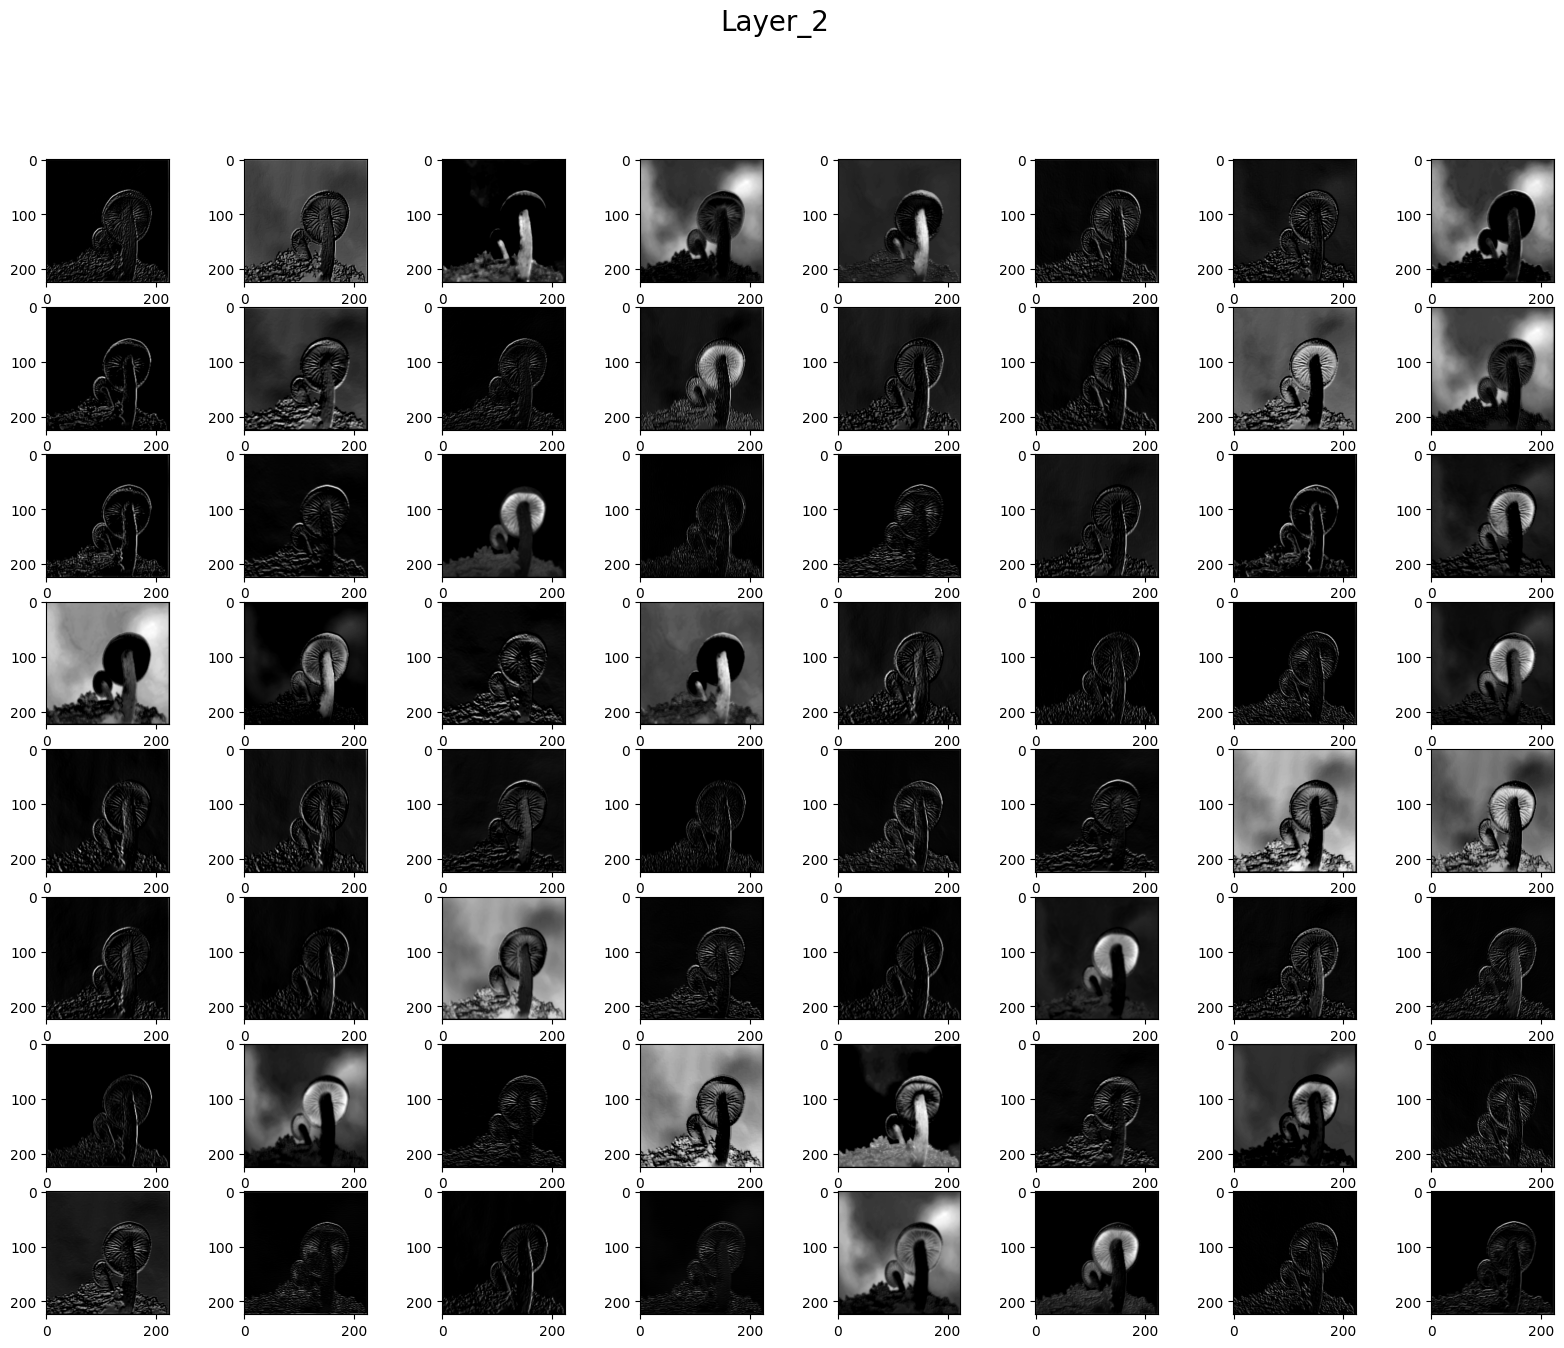

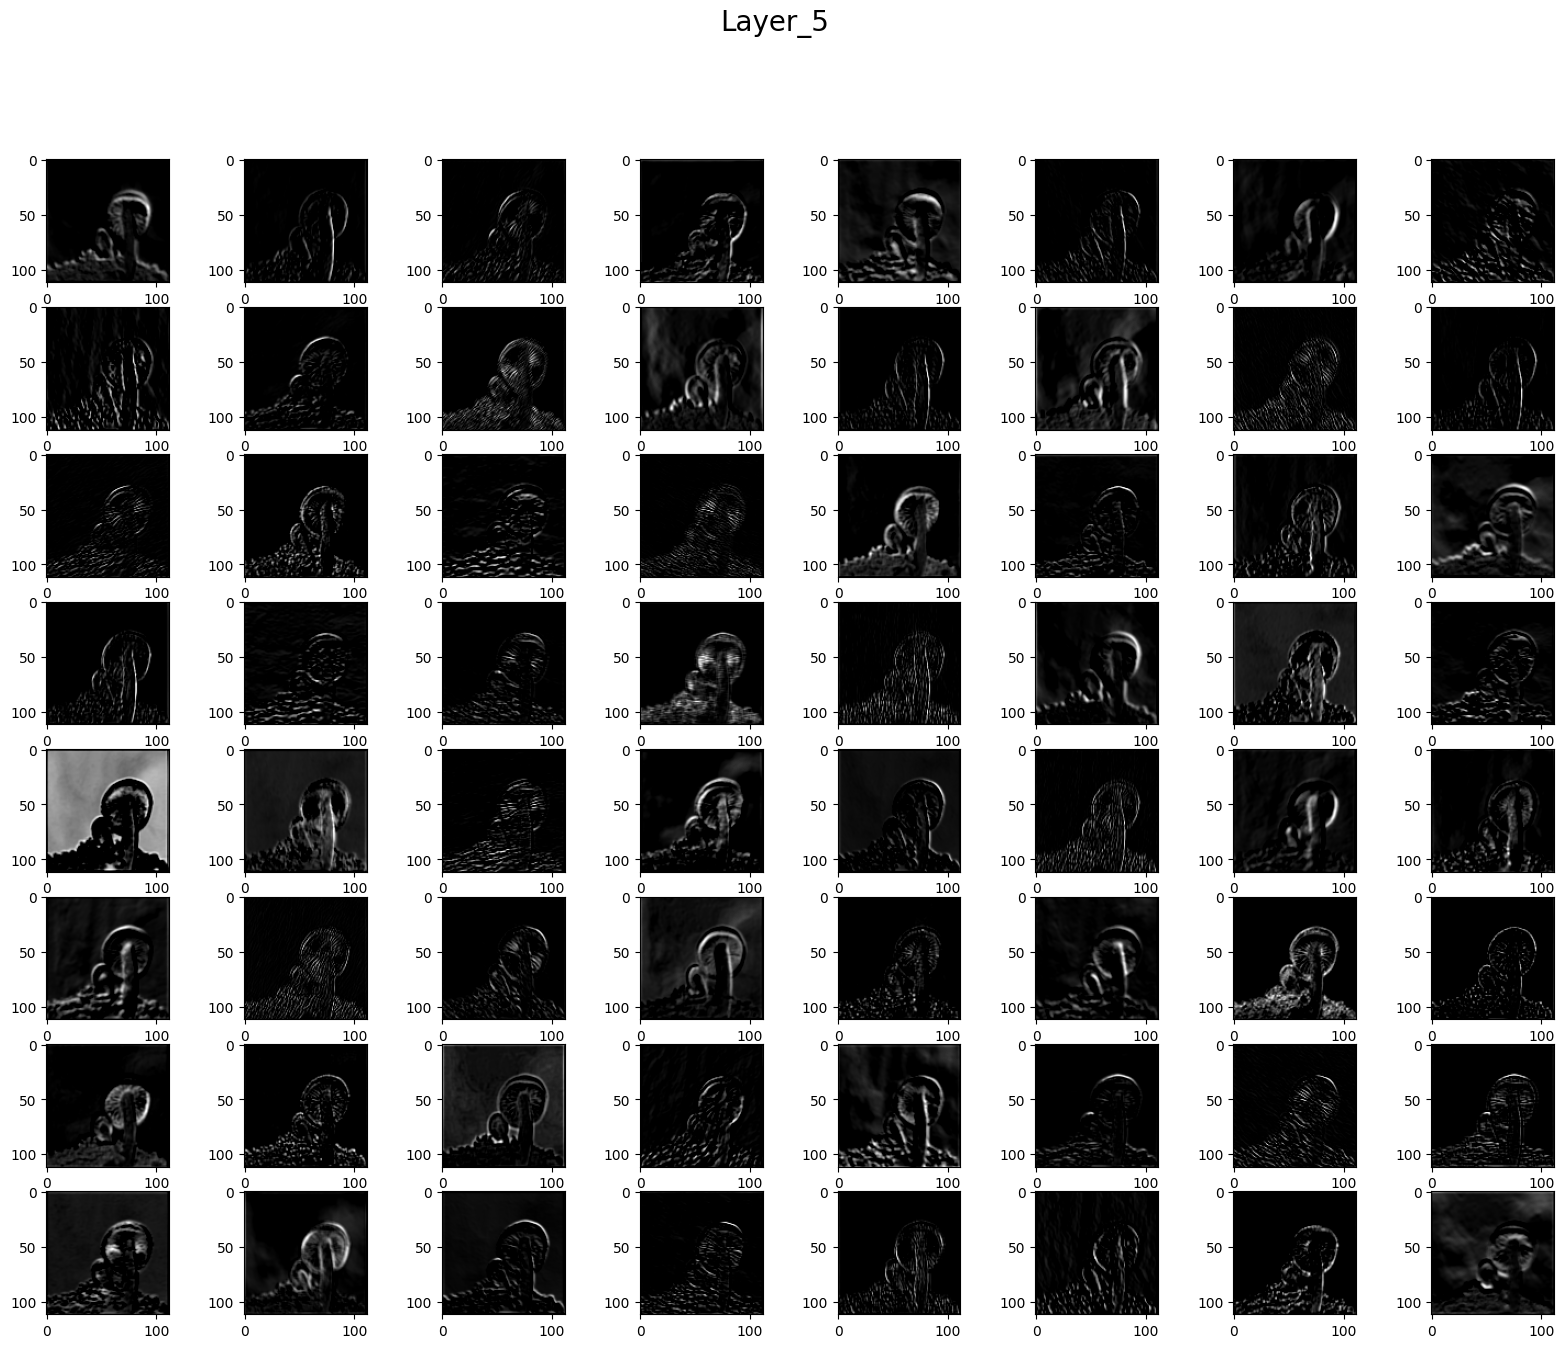

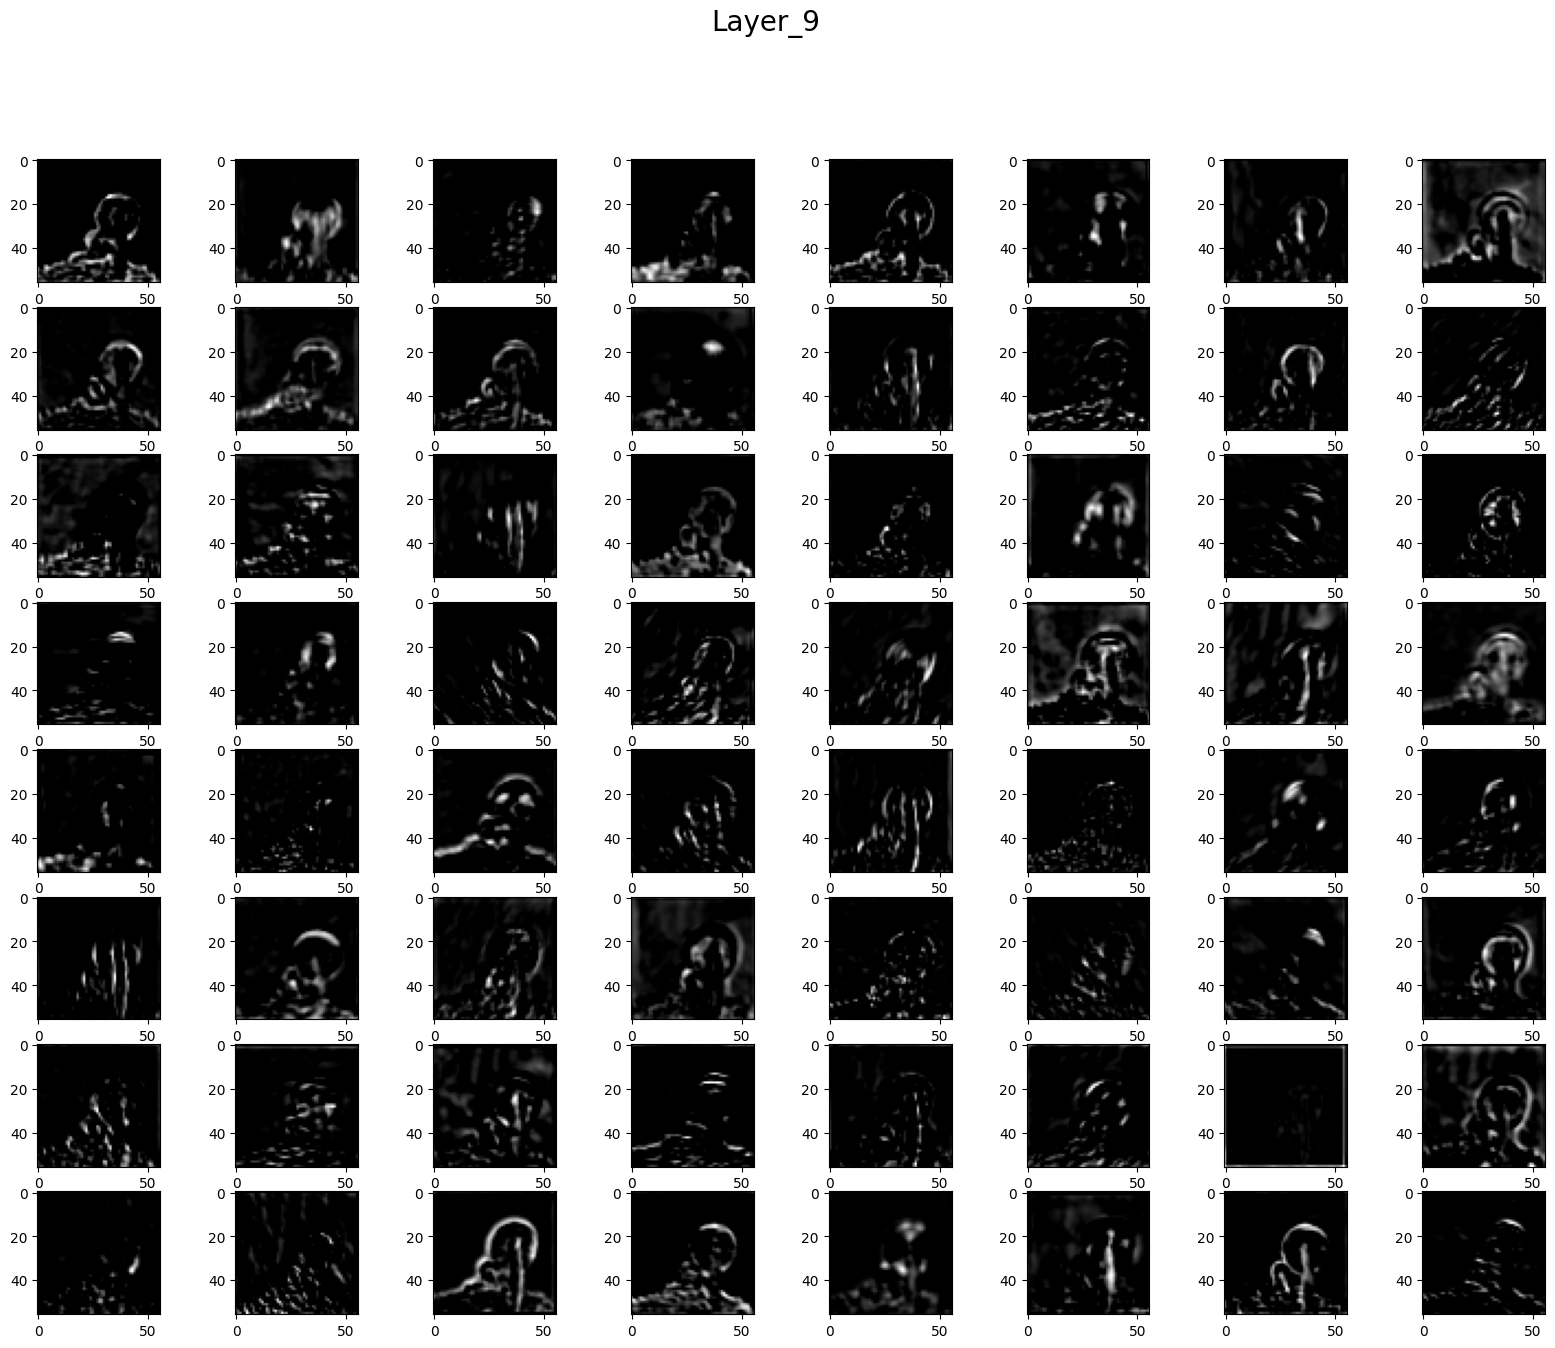

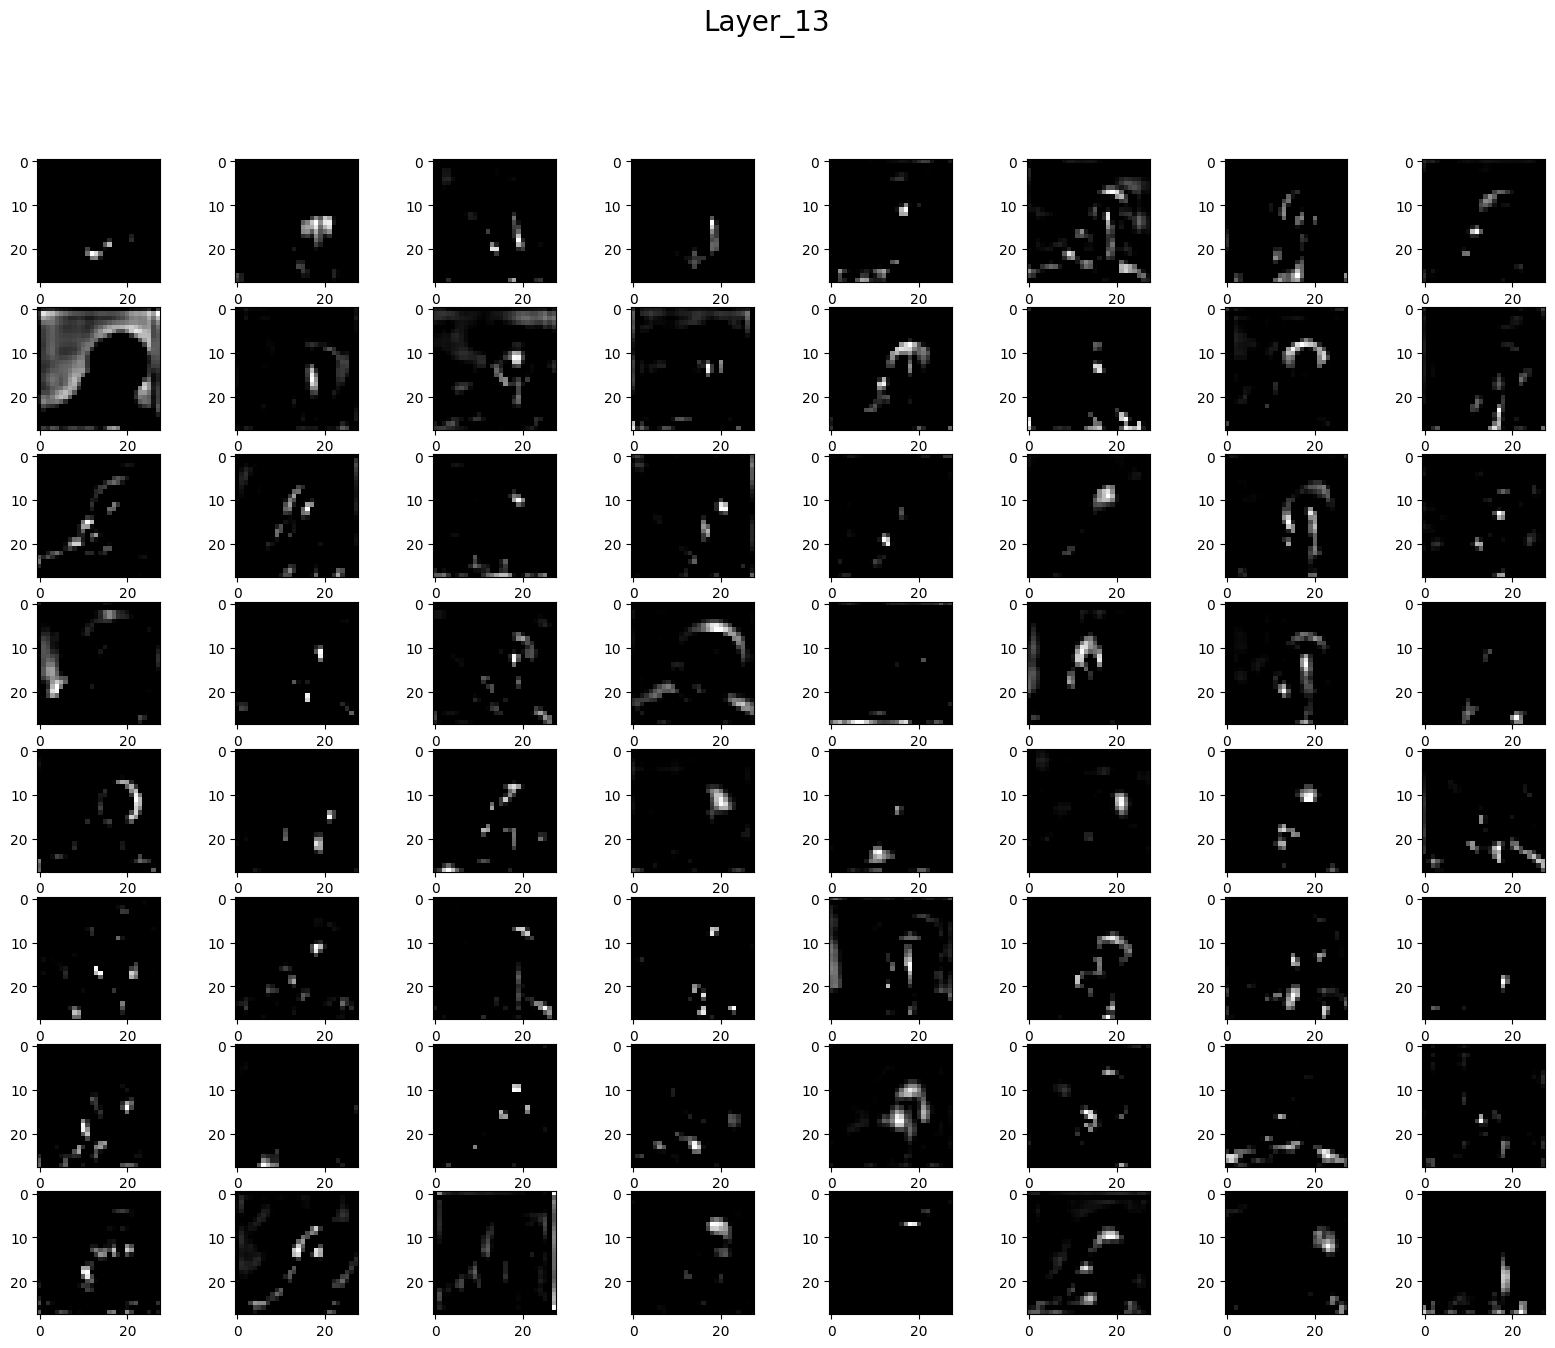

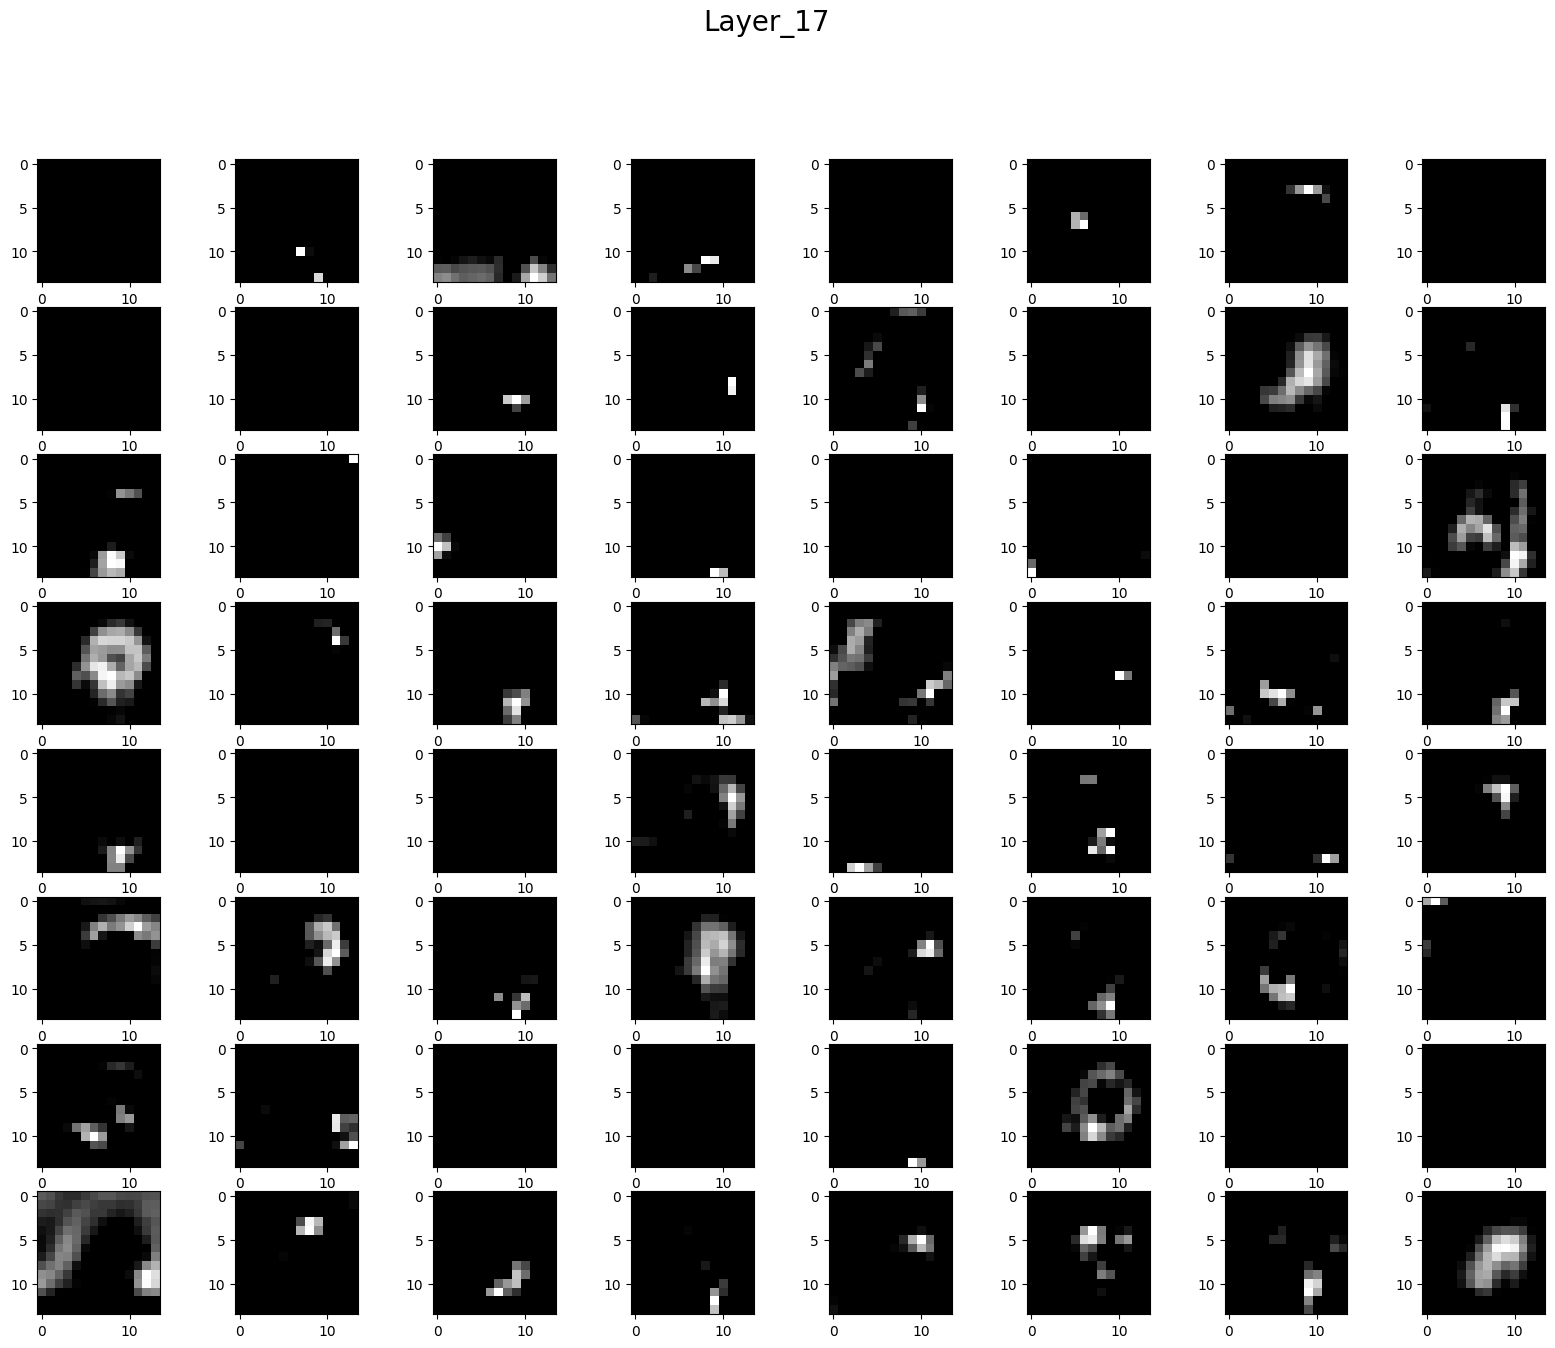

In [55]:
image = img3
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

model2 = VGG16()

layer_index = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model( inputs= model2.inputs, outputs = outputs)

feature_map = model3.predict(image)

for layer_idx, fmap in zip(layer_index, feature_map):
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle("Layer_{}".format(layer_idx), fontsize=20)
    num_channels = min(fmap.shape[3], 64)
    for i in range(1, num_channels + 1):
        plt.subplot(8, 8, i)
        plt.imshow(fmap[0, :, :, i - 1], cmap='gray')

plt.show()
